In [1]:
import pandas as pd
data = pd.read_csv('data/advertising.csv', index_col=0)
data

,TV,Weibo,WeChat,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


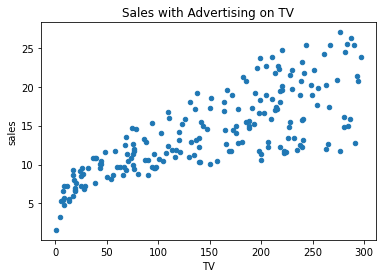

In [2]:
import matplotlib.pyplot as plt
data.plot(kind='scatter', x='TV', y='Sales', title='Sales with Advertising on TV')
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

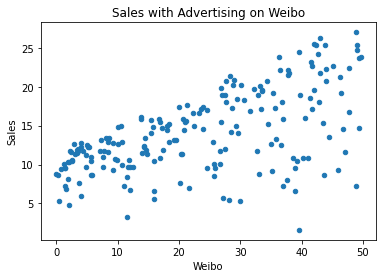

In [3]:
data.plot(kind='scatter', x='Weibo', y='Sales',
          title='Sales with Advertising on Weibo')
plt.show()

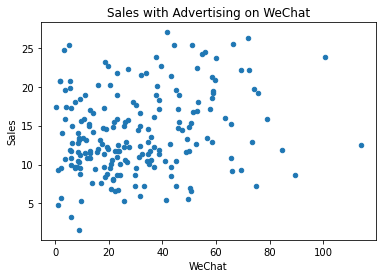

In [4]:
data.plot(kind='scatter', x='WeChat', y='Sales',
          title='Sales with Advertising on WeChat')
plt.show()

In [8]:
# 建立3个自变量(x1,x2,x3)与目标变量y的线性回归模型
x = data.iloc[:,0:3].values.astype(float)
y = data.iloc[:,3].values.astype(float)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression() # 初始化模型
linreg.fit(x,y) # 输入数据，学习模型
print('线性回归模型的回归系数是', linreg.coef_)
print('线性回归模型的截距是', linreg.intercept_)

线性回归模型的回归系数是 [ 0.04576465  0.18853002 -0.00103749]
线性回归模型的截距是 2.9388893694594085


In [12]:
# 将回归模型保存到文件中以便后续预测新数据时重新加载
# 'from sklearn.externals import joblib' failed
import joblib
joblib.dump(linreg, 'linreg.pkl')

load_linreg = joblib.load('linreg.pkl')

import numpy as np
new_x = np.array([[130.1,87.8,69.2]])
print('6月广告收入:', new_x)
print('预期销售', load_linreg.predict(new_x))

6月广告收入: [[130.1  87.8  69.2]]
预期销售 [25.37401071]
